# Homework 9

In [28]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('../../homework_data/sem_9/ugnivenko.va.csv', header = None)
data.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
25,0.0,-0.851694,-1.159204,0.016756,1.154947,0.633297,0.092213,-0.015623,0.043493,-0.126623,1.424438
102,0.0,-0.095915,-1.488089,1.534002,2.653834,0.172858,1.103321,0.153077,-0.430376,0.035390,-0.550190
956,1.0,-1.293208,0.001291,-0.241051,-0.887482,-0.205007,-1.402410,0.272715,-0.065817,1.363977,0.679381
209,0.0,0.634508,0.627533,-3.448630,-1.196442,-0.498356,-0.090159,-0.649020,-0.358069,-0.249825,-0.473392
676,1.0,-0.992187,-0.096106,-1.048622,1.020066,0.918009,0.144361,-0.872076,-1.244123,-0.151033,-0.331509


In [3]:
data.shape

(1000, 11)

In [4]:
y = data.values.T[0]
x = data.values.T[1:]

In [5]:
x.shape

(10, 1000)

In [6]:
y.shape

(1000,)

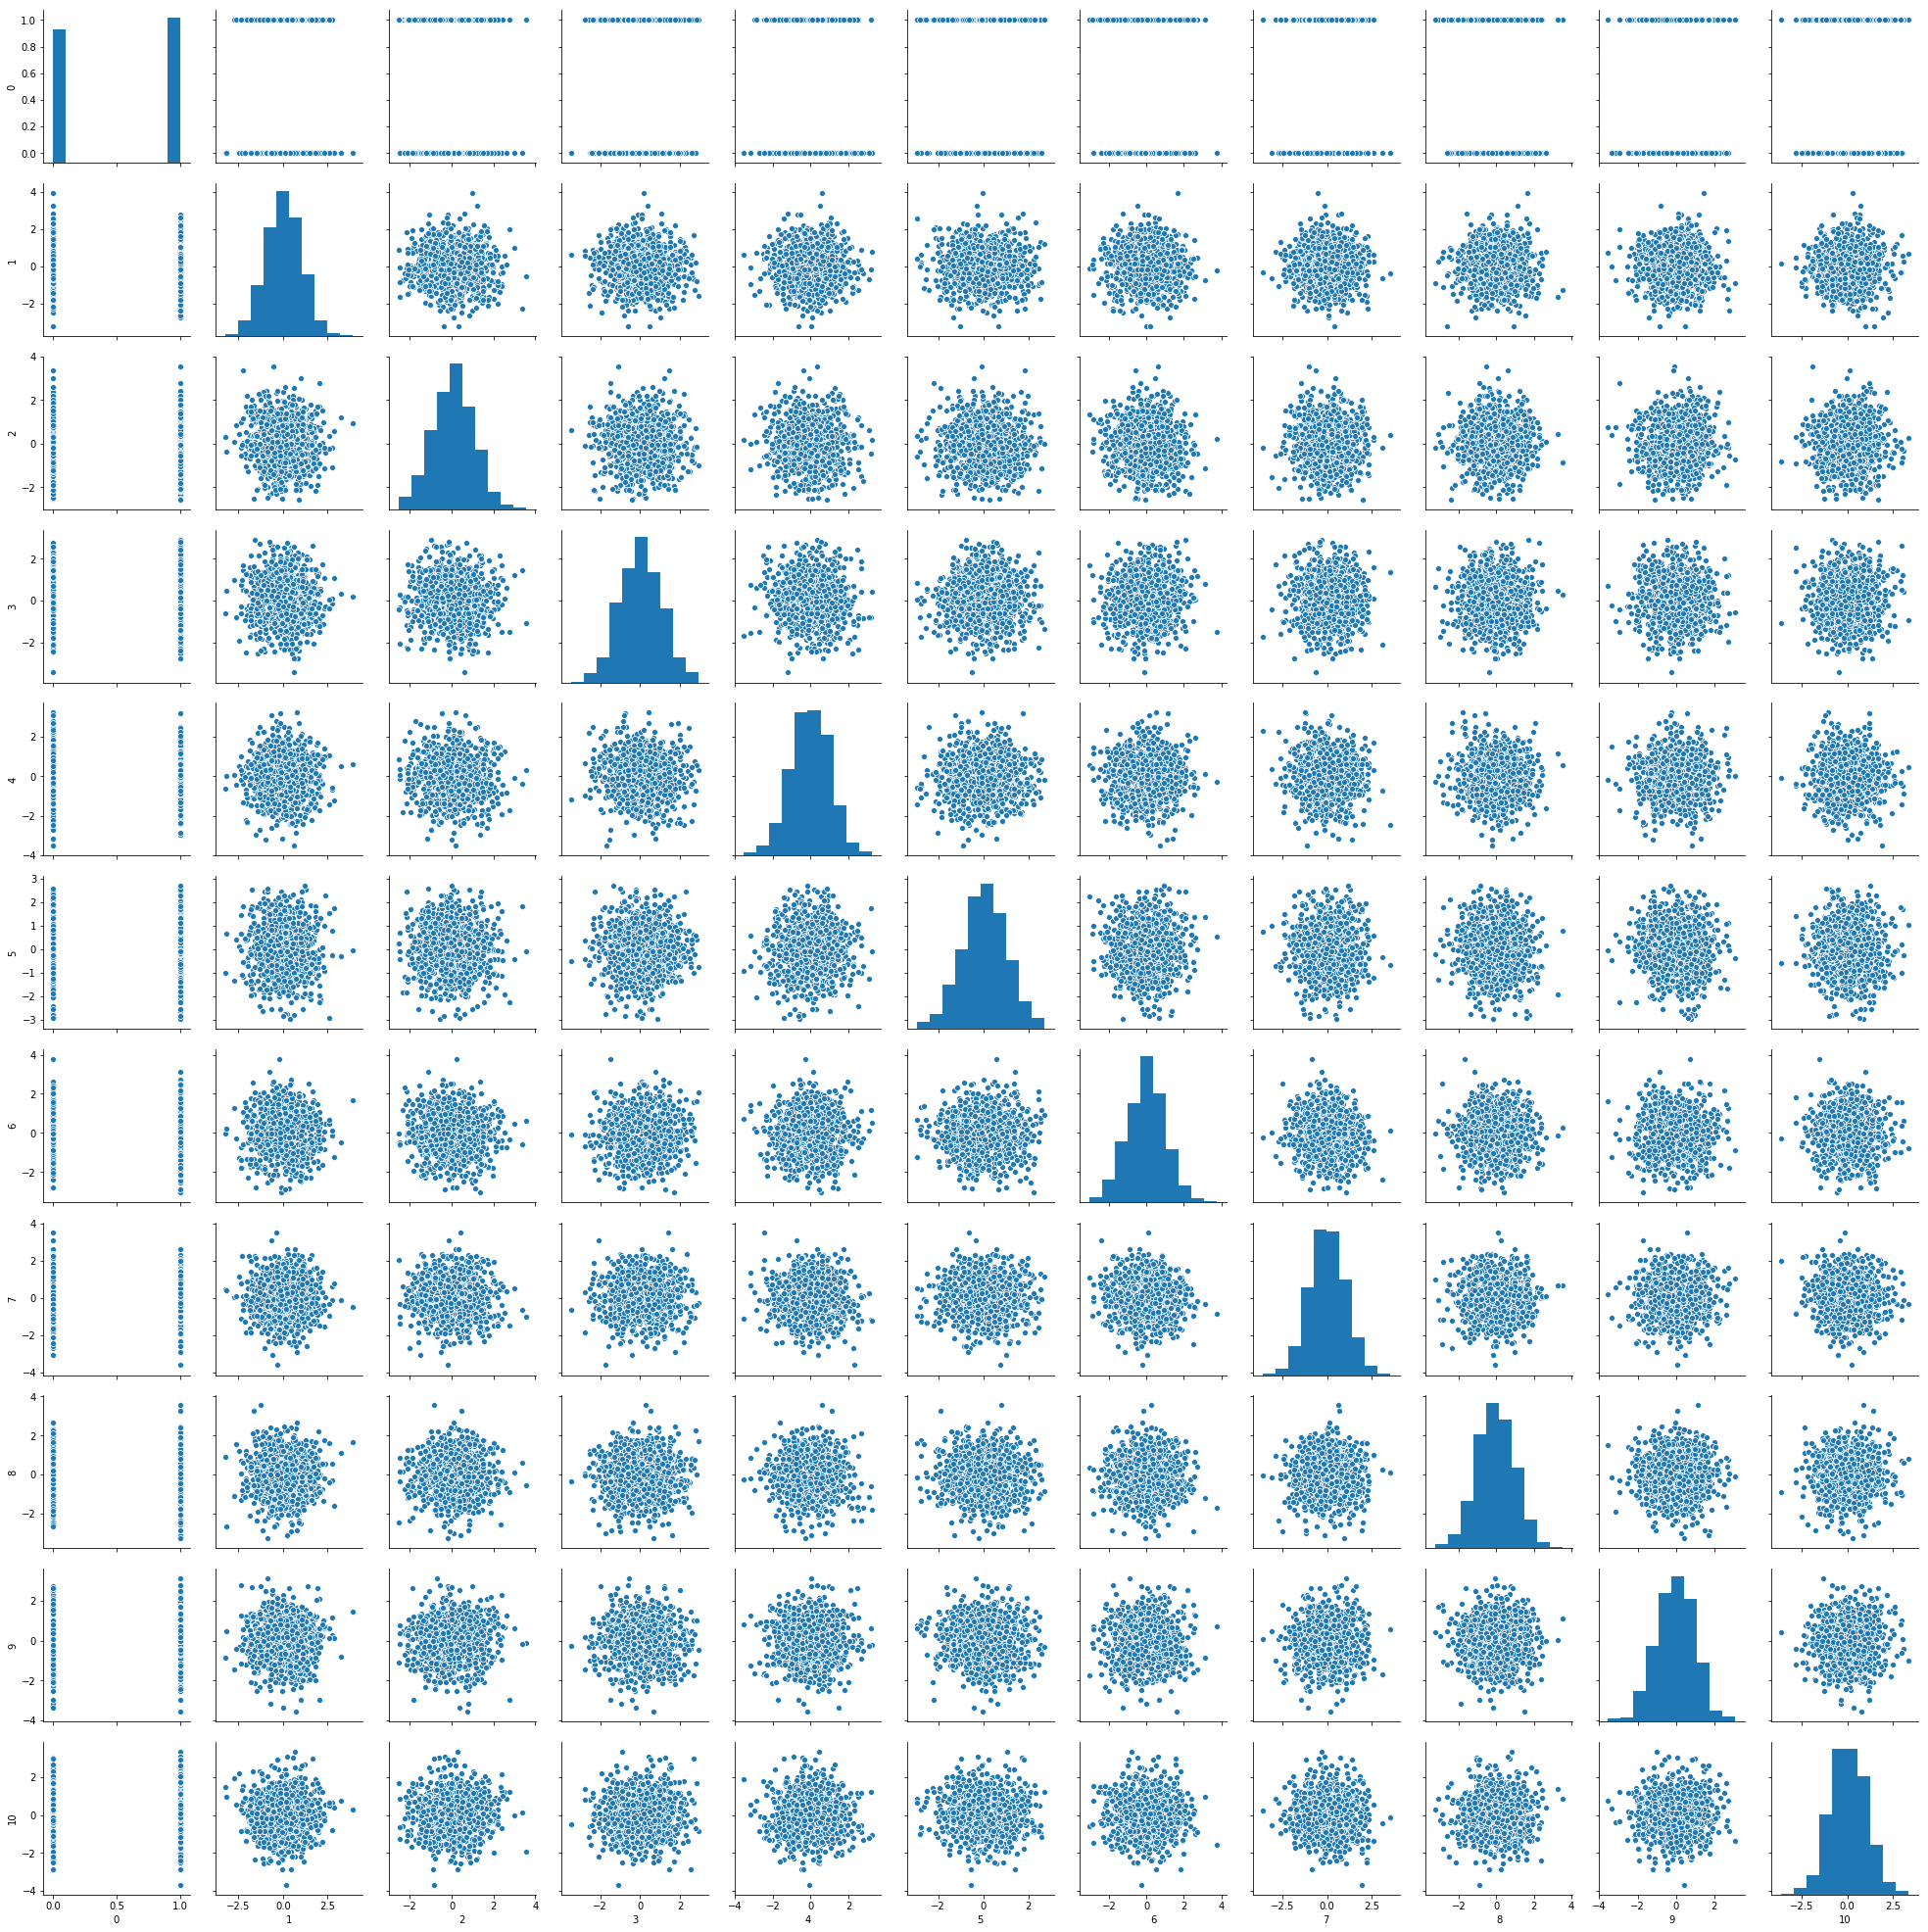

In [7]:
_ = sns.pairplot(data)

# Постройте модель логистической регрессии Y от X и свободного коэффициента. Каково отношение шансов Y=1 к событию f(X) = 1, где f(X) - отклик?

In [8]:
a = np.ones((y.shape[0], 1))
X = np.concatenate((a.T, x), axis=0)
pd.DataFrame(X.T).sample(5)

,0,1,2,3,4,5,6,7,8,9,10
899,1.0,-0.650234,1.670113,0.741099,-2.640832,-0.942153,-1.066848,-1.636962,-0.215089,0.931526,-0.086838
722,1.0,-0.087912,0.769033,-0.129103,-2.131353,-1.044164,0.294411,-0.993603,-0.291804,1.773149,-0.510970
83,1.0,1.853646,-0.676685,-0.402108,1.616872,-1.245240,0.393471,-1.211626,0.547388,0.425533,1.677366
0,1.0,1.676261,0.459387,-0.258930,-0.895539,-0.877436,-0.586452,-0.675298,1.518072,-0.389685,0.810980
17,1.0,1.023154,0.567548,0.405247,1.263446,0.714092,-2.468443,1.193382,-0.800345,0.548713,1.502064


In [9]:
X.T.shape

(1000, 11)

In [14]:
model = Logit(y ,X.T).fit()
model.params

Optimization terminated successfully.
         Current function value: 0.688156
         Iterations 4


array([ 0.08626592,  0.00841805, -0.03702354, -0.06528234, -0.00564976,
       -0.09018181,  0.01132029,  0.00551985, -0.01128253, -0.01959686,
        0.14377157])

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                0.005936
Time:                        15:45:12   Log-Likelihood:                -688.16
converged:                       True   LL-Null:                       -692.26
Covariance Type:            nonrobust   LLR p-value:                    0.6075
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0863      0.064      1.348      0.178      -0.039       0.212
x1             0.0084      0.064      0.131      0.896      -0.118       0.135
x2            -0.0370      0.065     -0.569      0.569      -0.165       0.091
x3            -0.0653      0.062     -1.059      0.290      -0.186       0.056
x4            -0.0056      0.062     -0.091      0.928      -0.128       0.116
x5            -0.0902      0.065     -1.393      0.164      -0.217       0.037
x6             0.0113      0.063      0.179      0.858      -0.113       0.135
x7             0.0055      0.064      0.086      0.932      -0.121       0.132
x8            -0.0113      0.064     -0.177      0.859      -0.136       0.114
x9            -0.0196      0.064     -0.309      0.758      -0.144       0.105
x10            0.1438      0.064      2.246      0.025       0.018       0.269
==============================================================================
"""

In [17]:
p_y = (y == 1).sum()/len(y)
print(f'p_y = ',p_y)

p_y =  0.521


In [25]:
f = model.predict(X.T)
response = np.array([round(x) for x in f])
p_response = (response == 1).sum()/len(response)
print(f'p_response = ',p_response)

p_response =  0.664


In [37]:
OR = (p_y/(1-p_y))/(p_response/(1-p_response))
print(f'OR = ', np.round(OR, decimals = 2))

OR =  0.55


# Какова точность (Accuracy) классификации модели при пороге вероятности для классификации p0 = 0.5 ? 

In [38]:
accuracy = accuracy_score(y, response)
print(f'accuracy = ', np.round(accuracy,decimals = 2))

accuracy =  0.54


# Постройте модель логистической регрессии Y от X и свободного коэффициента для первых 100 элементов выборки. Имеет ли смысл данная модель согласно критерию Вальда? (p-value=0.05)

In [30]:
X_new = X.T[0 : 100]
y_new = y[0:100]
X_new.shape, y_new.shape

((100, 11), (100,))

In [31]:
model_new = Logit(y_new ,X_new).fit()
model_new.params

Optimization terminated successfully.
         Current function value: 0.644271
         Iterations 5


array([-0.15857478,  0.43902314,  0.02005145,  0.04675634,  0.06789981,
       -0.4347249 ,  0.11154609,  0.02636262,  0.00972003, -0.14879369,
        0.26894701])

In [32]:
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       89
Method:                           MLE   Df Model:                           10
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                 0.06620
Time:                        16:06:33   Log-Likelihood:                -64.427
converged:                       True   LL-Null:                       -68.994
Covariance Type:            nonrobust   LLR p-value:                    0.5194
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1586      0.215     -0.738      0.461      -0.580       0.263
x1             0.4390      0.228      1.925      0.054      -0.008       0.886
x2             0.0201      0.207      0.097      0.923      -0.387       0.427
x3             0.0468      0.214      0.219      0.827      -0.372       0.465
x4             0.0679      0.222      0.306      0.760      -0.368       0.503
x5            -0.4347      0.233     -1.865      0.062      -0.892       0.022
x6             0.1115      0.226      0.493      0.622      -0.332       0.555
x7             0.0264      0.208      0.127      0.899      -0.381       0.433
x8             0.0097      0.201      0.048      0.962      -0.385       0.404
x9            -0.1488      0.191     -0.779      0.436      -0.523       0.225
x10            0.2689      0.206      1.303      0.193      -0.136       0.673
==============================================================================
"""

In [33]:
model_new.wald_test('const = x1 = x2 = x3 = x4 = x5 = x6 = x7 = x8 = x9 = x10 = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[8.54301465]], p-value=0.6639926691943161, df_denom=11>

Не имеет смысл, так как p_value > 0.05

# Можно ли обнулить первые четыре переменные согласно критерию Вальда? (p-value=0.05) 

In [36]:
model_new.wald_test('x1 = x2 = x3 = x4 = 0').summary()

'<Wald test (chi2): statistic=[[3.86857021]], p-value=0.4240850493230214, df_denom=4>'

Можно, так как p_value > 0.05